## Chapter 1.8: Onlap relationships
***
In some geologic cases we want to represent an onlap relationship, where layers deposited onto an erosive surface. This is also useful to model subduction zones as layers onlap the dipping plate. While surfaces in GemPy normally define the bottom of a unit, onlap surfaces represent the top surface, directly followed by other units.

Let's start as always by importing the necessary dependencies:

In [1]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../../..")
#sys.path.insert(0, '/home/miguel/anaconda3/lib/python3.6/site-packages/scikit_image-0.15.dev0-py3.6-linux-x86_64.egg/')
import skimage
# Importing gempy
import gempy as gp
import matplotlib.pyplot as plt
# Embedding matplotlib figures into the notebooks
#%matplotlib inline


# Aux imports
import numpy as np
import pandas as pn
import matplotlib
import theano
import qgrid

#%matplotlib widget

We import a model from an existing folder, representing a subduction zone with onlap relationships.
The theano function is automatically recombiled to allow changes.

In [2]:
geo_model = gp.load_model('Tutorial_ch1-8_Onlap_relations', path= '../../data/gempy_models', recompile=False)

Active grids: ['regular']


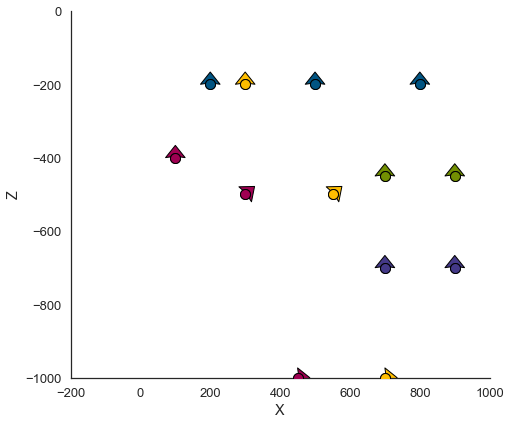

In [3]:
gp.plot.plot_data(geo_model)

In [4]:
gp.set_interpolation_data(geo_model, verbose=[])

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!


In [5]:
geo_model.set_regular_grid([-200,1000,-500,500,-1000,0], [50,50,50])

Active grids: ['regular']


Grid Object. Values: 
array([[-188., -490., -990.],
       [-188., -490., -970.],
       [-188., -490., -950.],
       ...,
       [ 988.,  490.,  -50.],
       [ 988.,  490.,  -30.],
       [ 988.,  490.,  -10.]])

Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[-188.        , -490.        , -990.        ],
       [-188.        , -490.        , -970.        ],
       [-188.        , -490.        , -950.        ],
       ...,
       [ 940.        ,  490.        , -433.99190054],
       [ 964.        ,  490.        , -420.94143014],
       [ 988.        ,  490.        , -398.14393621]])

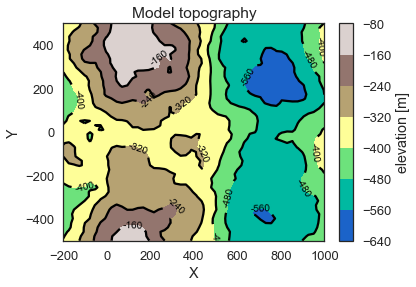

In [6]:
geo_model.set_topography(d_z=np.array([-600,-100]))

Now topography exist but not activated:

In [7]:
geo_model.grid.set_active('topography')

array([ True, False,  True, False, False])

In [8]:
s = gp.compute_model(geo_model, compute_mesh=True, debug=False)

../../../gempy/core/solution.py:266: UserWarning: Attribute error. Using non masked marching cubesmarching_cubes_lewiner() got an unexpected keyword argument 'mask'.
  warnings.warn('Attribute error. Using non masked marching cubes' + str(e)+'.')


In [9]:
geo_model.solutions.geological_map

array([array([[5., 5., 5., ..., 2., 2., 2.]]),
       array([[1.25750208, 1.28629829, 1.32684556, ..., 1.20771012, 1.22402321,
        1.25252008],
       [1.25750208, 1.28629829, 1.32684556, ..., 1.20771012, 1.22402321,
        1.25252008],
       [0.60335797, 0.63155555, 0.66758074, ..., 1.33863583, 1.37043555,
        1.40689857],
       [0.61945166, 0.64822677, 0.68604369, ..., 1.39297644, 1.42446393,
        1.46109821]])], dtype=object)

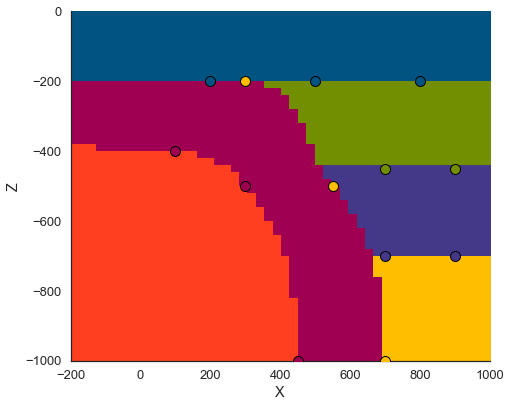

In [10]:
gp.plot.plot_section(geo_model, 25, show_data=True)

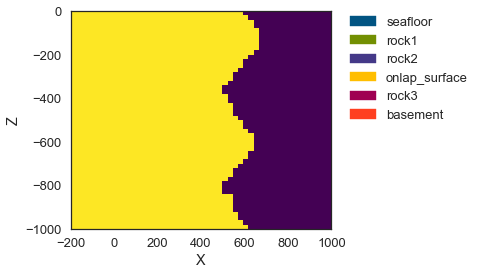

In [11]:
gp.plot.plot_section(geo_model, 2, block=geo_model.solutions.mask_matrix_pad[3].T, show_data=True,
                    )

In [12]:
vtkp = gp.plot.plot_3D(geo_model, render_surfaces=True, render_data=True)

holding... Use vtk.resume to go back to the interactive window


In [13]:
vtkp.set_real_time_on()

Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[-188.        , -490.        , -990.        ],
       [-188.        , -490.        , -970.        ],
       [-188.        , -490.        , -950.        ],
       ...,
       [ 940.        ,  490.        , -442.67872694],
       [ 964.        ,  490.        , -461.77197163],
       [ 988.        ,  490.        , -489.63366375]])

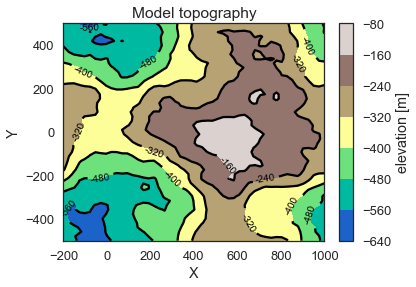

In [14]:

geo_model.set_topography(d_z=np.array([-600,-100]), plot_object=vtkp)

In [15]:
vtkp.resume()

holding... Use vtk.resume to go back to the interactive window


In [16]:
geo_model.surfaces

,surface,series,order_surfaces,isActive,color,id
0,seafloor,seafloor_series,1,True,#015482,1
1,rock1,right_series,1,True,#728f02,2
2,rock2,right_series,2,True,#443988,3
5,onlap_surface,onlap_series,1,True,#ffbe00,4
3,rock3,left_series,1,True,#9f0052,5
4,basement,basement,1,True,#ff3f20,6


In [17]:
vtkp.resume()

holding... Use vtk.resume to go back to the interactive window


Save model if any changes were made:

In [18]:
# geo_model.save_model('Tutorial_ch1-8_Onlap_relations', path= '../data/gempy_models',)